# AIML Assignment 2: Unsupervised Learning (Part B)
- Name: Ashley Bai
- Admin No.: P2237871
- Class: DAAA/FT/2A/04

# Background
- You are running a shopping mall, and you have some data about your customers like Age, Gender, Income, and Spending.

# Aim
- How to perform customer segmentation using unsupervised ML algorithms in python?
- Describe the characteristics of each customer cluster.
- Which group of customer is the most valuable to the shopping mall so that the shopping mall should do something to retain them. 

# Table of Contents
1. Background/Introduction
2. Exploratory Data Analysis (EDA)
3. Data Pre-Processing
4. Dimension Reduction
    - PCA
5. Feature Engineering
    - Feature selection
    - Feature Scaling
6. Data Visualization
7. Building Clustering Algorithm & Evaluating them (determine the optimal number of clusters, visualize them)
8. Conclusion & Insights
    - Identifying valuable customer groups, retention strategies, anomaly detection.

# Background Research
- Customer segmentation is the subdivision of a market into discrete customer groups that share similar characteristics.
- Customer Segmentation can be a powerful means to identify unsatisfied customer needs. 
- Using the data below, companies can then outperform the competition by developing uniquely appealing products and services.

<h1><center>Exploratory Data Analysis (EDA)</center></h1>

<h3>Import libraries/modules</h3>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings("ignore")

<h3>Load the Customer Dataset</h3>
- General overview of how the dataset looks like.

In [40]:
# load dataset
df = pd.read_csv("C:\YEAR 2 SEM 1\DAAAAIML\DAAAAIML_CA2\ST1511-CA2-dataset\Customer_Dataset.csv")

In [41]:
# display dataset
df.head(5)

,CustomerID,Gender,Age,Income (k$),How Much They Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
# display dataset
df.tail(5)

,CustomerID,Gender,Age,Income (k$),How Much They Spend
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


- The dataset contains numerical variables, as well as categorical variables (Gender).

<h3>Check the shape of df</h3>

In [43]:
# number of rows and columns in df
df.shape

(200, 5)

- There are 200 rows and 5 columns in the original Customer dataframe.

<h3>Check the data types of df (Existence of null values/categorical variables)</h3>

In [44]:
# display data types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           200 non-null    int64 
 1   Gender               200 non-null    object
 2   Age                  200 non-null    int64 
 3   Income (k$)          200 non-null    int64 
 4   How Much They Spend  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- Data Types of variables: 
    - Numerical variables: CustomerID, Age, Income (k$), How Much They Spend.
    - Categorical variables: Gender.
- Existence of Null Values: 
    - There are no null values in the dataframe. 

<h3>Values in categorical column (Gender)</h3>

In [45]:
# values in columns in df (categorical variables)
print(df['Gender'].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


- There are 112 female customers and 88 male customers.

<h3>Check for existence of duplicate values in df</h3>

In [46]:
# check for duplicated values/rows
print('Are there duplicated values/rows in df:\n', df.duplicated())
print('\n')

# count the number of duplicated rows
duplicated_rows = df.duplicated().sum()

# display the number of duplicated rows
print('Number of duplicated rows: ', duplicated_rows)

Are there duplicated values/rows in df:
 0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


Number of duplicated rows:  0


- There are no duplicated rows in the Customer dataframe.
- No data redundancy. 

<h3>Check for existence of outliers in df (numerical columns)</h3>

<AxesSubplot:ylabel='How Much They Spend'>

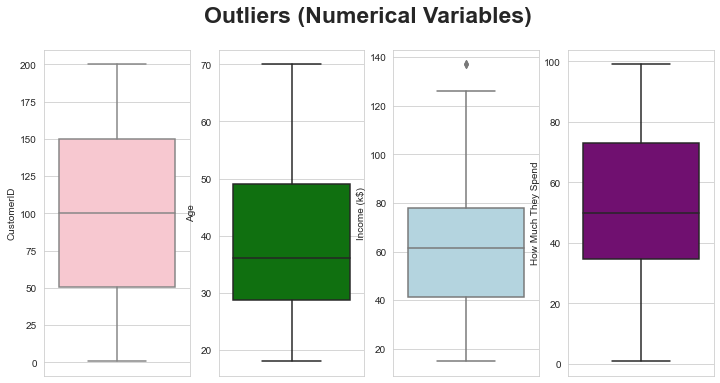

In [47]:
# check for outliers by plotting box plots 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers 
# create figure & axis
fig, ax = plt.subplots(1,4, figsize=(12,6))
# set title for overall figure
fig.suptitle('Outliers (Numerical Variables)', weight="bold", fontsize=23)

# plot boxplots 
plt.subplot(141)
sns.boxplot(y=df['CustomerID'], color='pink')
plt.subplot(142)
sns.boxplot(y=df['Age'], color='green')
plt.subplot(143)
sns.boxplot(y=df['Income (k$)'], color='lightblue')
plt.subplot(144)
sns.boxplot(y=df['How Much They Spend'], color='purple')

- Generally no outliers in the dataframe.
- Data in Customer dataframe generally follow a consistent distribution.
- However, from the box plots, it is evident that there is one outlier in the column, Income (k$), which deviates from the rest of the data distribution.
- The presence of this single outlier could be due to an anomaly in the data.

<h3>Check for existence of missing values in df</h3>

In [48]:
# check for missing values
# returns True if there are missing/null values
print(df.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(df.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(df.isnull().sum(), "\n")

False 

0 

CustomerID             0
Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64 



- There are no missing values in the Customer dataframe. 

<h3>Summary statistics of numerical features in df</h3>

In [49]:
# display summary statistics of numerical features
df.describe().round()

,CustomerID,Age,Income (k$),How Much They Spend
count,200.0,200.0,200.0,200.0
mean,100.0,39.0,61.0,50.0
std,58.0,14.0,26.0,26.0
min,1.0,18.0,15.0,1.0
25%,51.0,29.0,42.0,35.0
50%,100.0,36.0,62.0,50.0
75%,150.0,49.0,78.0,73.0
max,200.0,70.0,137.0,99.0


- There are 200 distinct customers in the Customer dataset.
- The average age of the customers is 39 years old, with the youngest being 18 and oldest being 70.
- The income gap is decent, where the standard deviation is 61k dollars. 
- The average amount customers spend is around 50k dollars. 

<h1><center>Data Pre-Processing</center></h1>

<h3>Handling categorical variables</h3>

- In this case, for unsupervised learning and clustering, it is generally better to avoid label encoding (converting Gender column to numerical).
- This may unnecessarily introduce ordinal relationships that do not exist in the data.
- Some clustering algorithms such as K-means, are sensitive to the scale and magnitude of the features. Converting will affect model's performance and lead to bias and inaccurate results. 
- May also create a higher-dimensional feature space, possibly negatively impacting the performance of clustering algorithms, particularly those sensitive to dimensionality.
- Furthermore, upon feature selection, we will find out if Gender is truly relevant for customer segmentation. So for now, we will not change anything. 

<h3>Rename columns</h3>

In [50]:
# inspect columns of customer df
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income (k$)', 'How Much They Spend'], dtype='object')

In [51]:
# rename columns that are confusing
df = df.rename(columns={'Income (k$)': 'Income ($k)', 'How Much They Spend': 'Spendings ($k)'})

# display output
df.head(5)

,CustomerID,Gender,Age,Income ($k),Spendings ($k)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h1><center>Feature Engineering</center></h1>

<h3>Creating new features</h3>

- <b>New feature 1: Spending Ratio</b>
    - Calculate the ratio of spendings to income for each customer.
    - This feature can help identify customers who allocate a higher proportion of their income towards shopping, indicating higher value to the mall.

In [52]:
# calculate ratio of customer's spendings to customer's income
df['Spending_Ratio'] = df['Spendings ($k)']  /df['Income ($k)']

# show new df
df.head(5)

,CustomerID,Gender,Age,Income ($k),Spendings ($k),Spending_Ratio
0,1,Male,19,15,39,2.600000
1,2,Male,21,15,81,5.400000
2,3,Female,20,16,6,0.375000
3,4,Female,23,16,77,4.812500
4,5,Female,31,17,40,2.352941


- <b>New feature 2: Spending Score</b>
    - Calculate the Z-Score for each customer's spending.
    - This feature can help measure how a customer's spending compares to the average spending of all the customers, helping to identify high spenders and low spenders to the overall customer base. 
    - The Z-Score represents how many standard deviations the customer's spending is from the mean spending. 
    - Positive z-scores indicate that the customer spends more than the average, while negative z-scores indicate lower spending compared to the average.

In [53]:
# calculate the mean and std of 'Spendings ($k)'
mean_spending = df['Spendings ($k)'].mean()
std_spending = df['Spendings ($k)'].std()

# calculate the Z-Score for each customer's spending
df['Spending_Score'] = (df['Spendings ($k)'] - mean_spending) / std_spending

# show new df
df.head(5)

,CustomerID,Gender,Age,Income ($k),Spendings ($k),Spending_Ratio,Spending_Score
0,1,Male,19,15,39,2.600000,-0.433713
1,2,Male,21,15,81,5.400000,1.192711
2,3,Female,20,16,6,0.375000,-1.711618
3,4,Female,23,16,77,4.812500,1.037814
4,5,Female,31,17,40,2.352941,-0.394989


<h3>Feature selection</h3>

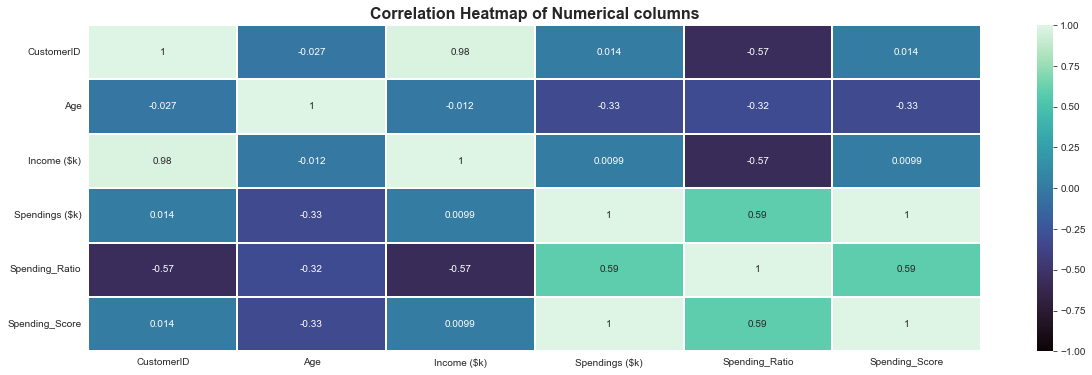

In [54]:
# define variables 
vars = ['CustomerID', 'Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score'] 

# create and set figure size
plt.figure(figsize = (20,6))

# correlation plot
corr = df[vars].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1.0, cmap='mako', annot=True)

# graph title
plt.title('Correlation Heatmap of Numerical columns', fontweight='bold', fontsize=16)
# display graph
plt.show()

- Remove non-informative columns: 
    - Certain columns like CustomerID may not contribute to clustering and can be removed.

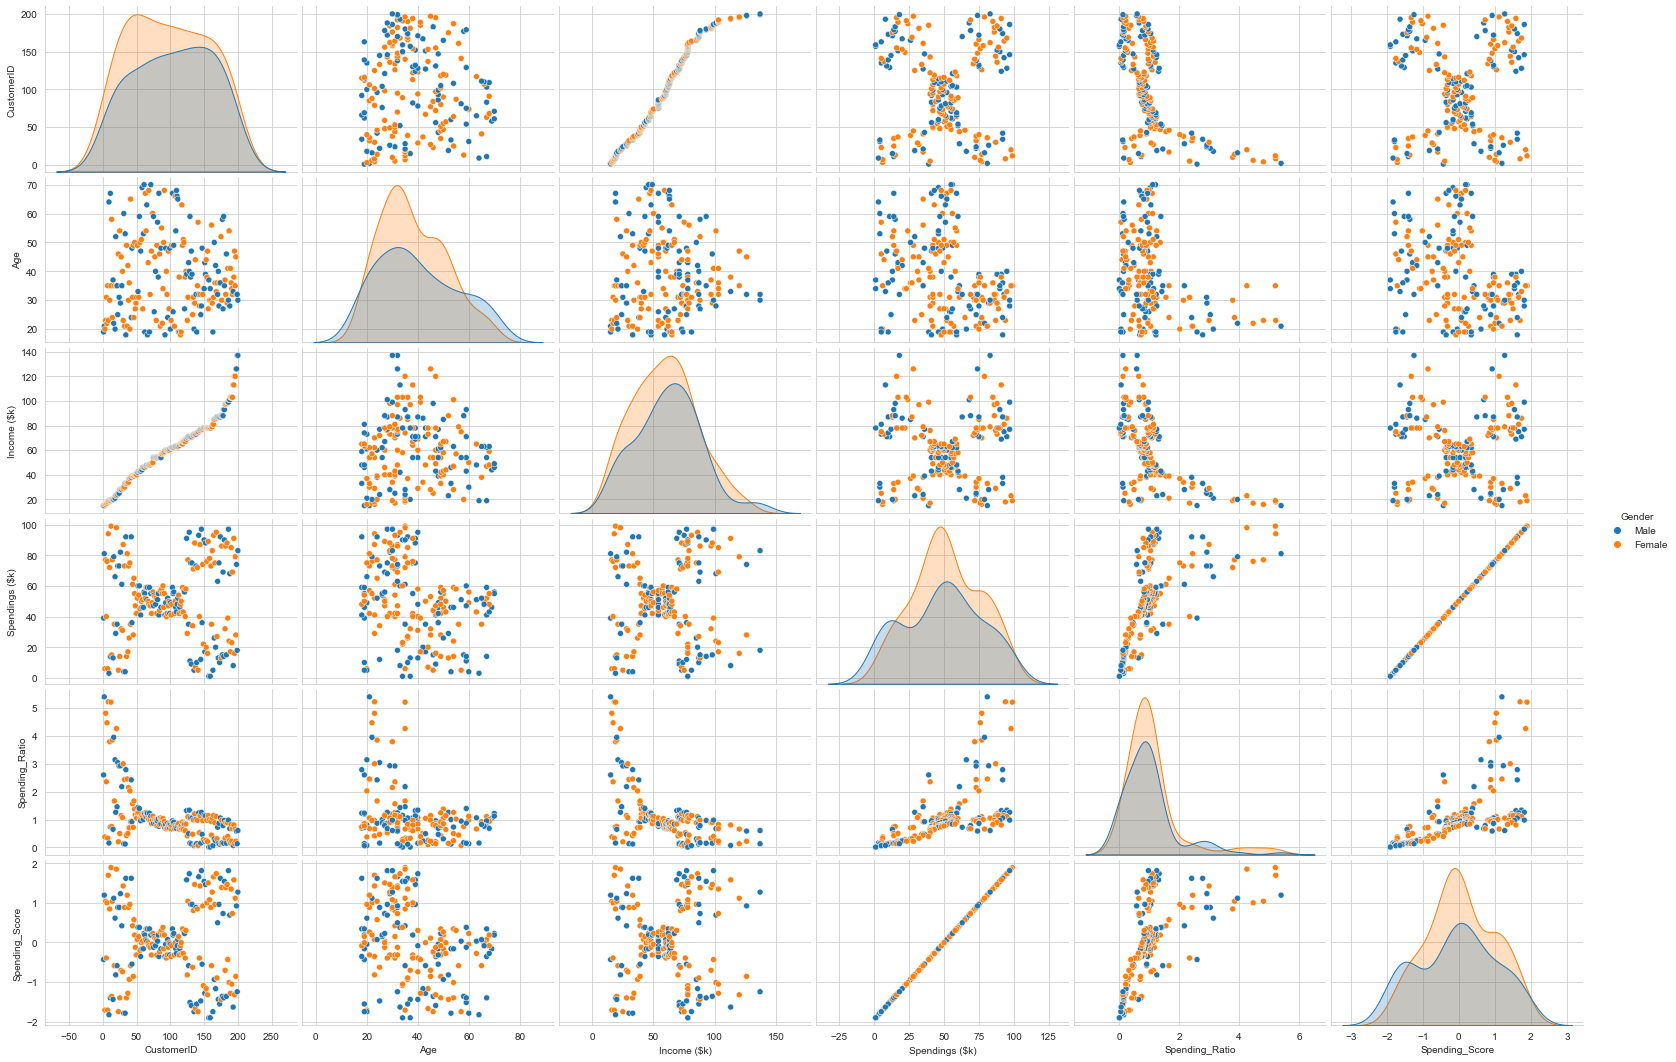

In [55]:
# Check if Gender impacts other features
sns.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

- Furthermore, as shown in the pairplot, there is no clear relationship between Gender and the other features. 

<h4>Dropping irrelevant columns: Gender and CustomerID</h4>

In [56]:
df = df.drop(['CustomerID', 'Gender'], axis=1)
print(df)

     Age  Income ($k)  Spendings ($k)  Spending_Ratio  Spending_Score
0     19           15              39        2.600000       -0.433713
1     21           15              81        5.400000        1.192711
2     20           16               6        0.375000       -1.711618
3     23           16              77        4.812500        1.037814
4     31           17              40        2.352941       -0.394989
..   ...          ...             ...             ...             ...
195   35          120              79        0.658333        1.115262
196   45          126              28        0.222222       -0.859681
197   32          126              74        0.587302        0.921640
198   32          137              18        0.131387       -1.246925
199   30          137              83        0.605839        1.270160

[200 rows x 5 columns]


<h3>Feature scaling</h3>

- Since some machine learning algorithms make assumptions that higher ranging numbers in the dataset have some sort of superiority (play a more decisive role), in order to have the most accurate and reliable results, we should scale our features with <b>standardization</b>

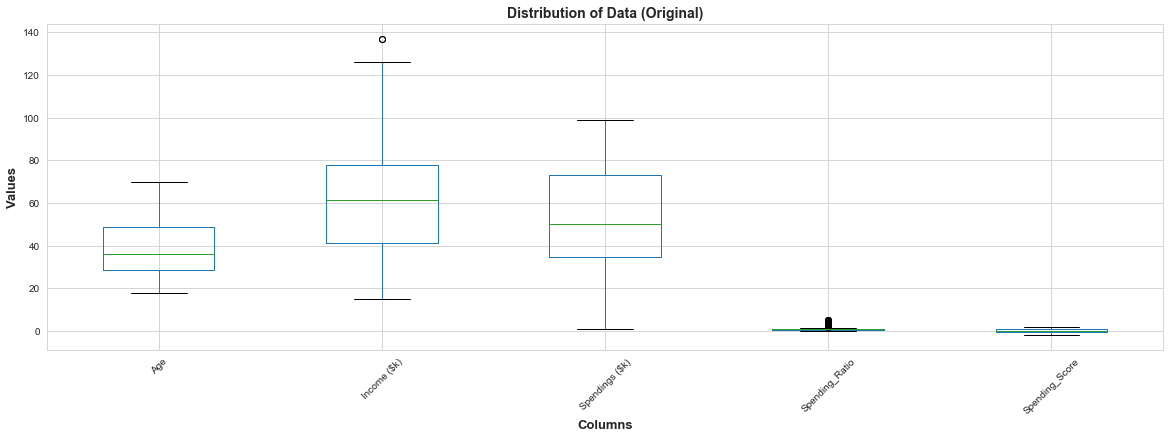

In [57]:
# import libraries for feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# create and set figure size
fig, ax = plt.subplots(figsize=(20, 6))

# plot boxplots
df.boxplot(ax=ax)

# graph labels and title
ax.set_title('Distribution of Data (Original)', fontsize=14, fontweight='bold')
ax.set_xlabel('Columns', fontsize=13, fontweight='bold')
ax.set_ylabel('Values', fontsize=13, fontweight='bold')
ax.set_xticklabels(df.columns, rotation=45)  

# display boxplots
plt.show()

- As seen in the figure above, the medians of all the features of the datasets are vastly different.
- The distributions of the features are also different, with some boxplots being narrower/wider than others, indicating different interquartile ranges.
- The length of the whiskers also vary for all the features, indicating different ranges. 
- There is also an outlier in column 4, Income ($k). 

<h4>Standardization</h4>

- It involves transforming the features of a dataset to have a <b>mean of 0 and a standard deviation of 1</b>, so that all features have a similar scale, making them comparable and easier for the machine learning algorithms to process.

In [58]:
# standardization
std_scaler = StandardScaler()
# fit and transform to the df to standardize it
dfNew = std_scaler.fit_transform(df)

# creating a new standardized df 
dfNew = pd.DataFrame(data=dfNew, columns=['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score'])
dfNew.head(5)

,Age,Income ($k),Spendings ($k),Spending_Ratio,Spending_Score
0,-1.424569,-1.738999,-0.434801,1.577244,-0.434801
1,-1.281035,-1.738999,1.195704,4.460960,1.195704
2,-1.352802,-1.700830,-1.715913,-0.714279,-1.715913
3,-1.137502,-1.700830,1.040418,3.855894,1.040418
4,-0.563369,-1.662660,-0.395980,1.322799,-0.395980


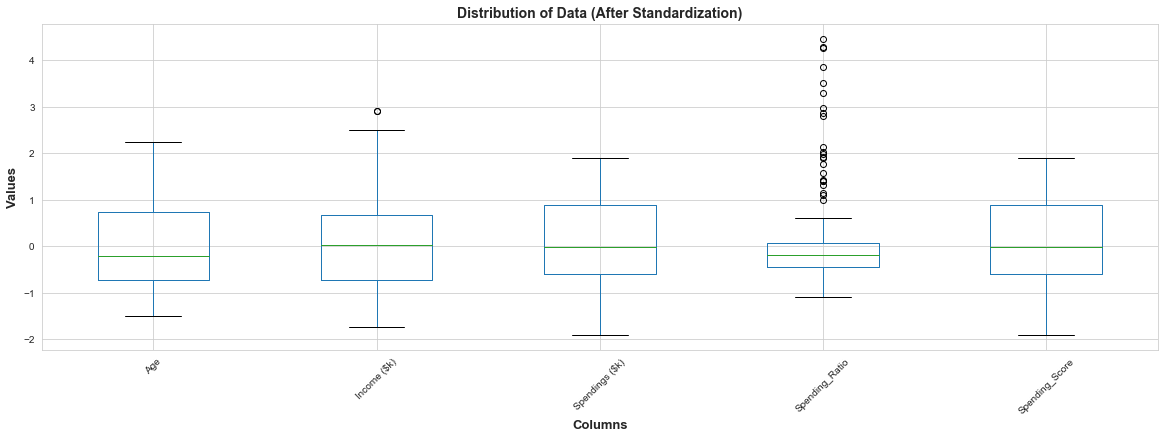

In [59]:
# create and set figure size
fig, ax = plt.subplots(figsize=(20, 6))

# plot boxplots
dfNew.boxplot(ax=ax)

# graph labels and title
ax.set_title('Distribution of Data (After Standardization)', fontsize=14, fontweight='bold')
ax.set_xlabel('Columns', fontsize=13, fontweight='bold')
ax.set_ylabel('Values', fontsize=13, fontweight='bold')
ax.set_xticklabels(dfNew.columns, rotation=45)  

# display boxplots
plt.show()

- Although the data has different min and max values, the distributions of the numerical variables have all been transformed to have a mean of around 0 and standard deviation of 1. 
- The numerical variables in the customer dataset all now on a similar scale, and are suitable for ML algorithms.

<h3>Principal Component Analysis (PCA)</h3>

In [60]:
# import PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(dfNew)
pca_samples = pca.transform(dfNew)

In [61]:
#We pass the original data and non-centered pca values.

def pca_results(dfNew, pca):
    
    # dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = dfNew.keys()) 
    components.index = dimensions

    # PCA eigenvalues
    explained_var = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(explained_var, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [62]:
# assign the function to the centered data 
pca_results = pca_results(dfNew, pca)
pca_results

,Eigenvalue,Explained Variance,Age,Income ($k),Spendings ($k),Spending_Ratio,Spending_Score
PC 1,2.7199,0.5413,-0.3078,-0.1587,0.5609,0.5008,0.5609
PC 2,1.2962,0.2579,-0.1606,0.8246,0.2540,-0.4064,0.2540
PC 3,0.8227,0.1637,-0.9297,-0.0182,-0.2601,0.0054,-0.2601


- PC 1, Spendings, Spending_Ratio, and Spending_Score exhibit high positive loadings, implying that customers with higher spending and spending ratios are positively correlated with this component. 
- PC 2, on the other hand, highlights the significance of Income in positively influencing the component, while negatively correlating with Age and Spending_Ratio. 
- PC 3 emphasizes the impact of Age in a negative direction, suggesting that older customers contribute more to this component.
- These features are likely important drivers of spending behavior and could be retained for segmentation.

<h1><center>Data Visualization</center></h1>

<h3>Relationship Between Numerical Variables</h3>

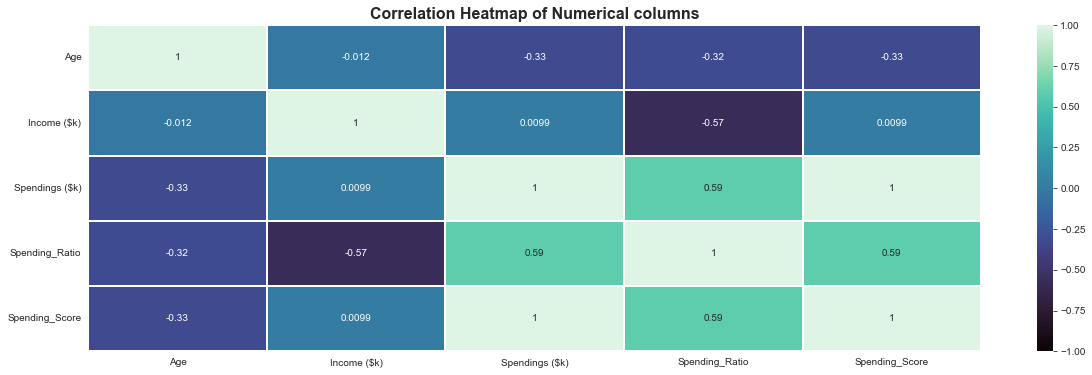

In [63]:
# define variables 
vars = ['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score'] 

# create and set figure size
plt.figure(figsize = (20,6))

# correlation plot
corr = df[vars].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1.0, cmap='mako', annot=True)

# graph title
plt.title('Correlation Heatmap of Numerical columns', fontweight='bold', fontsize=16)
# display graph
plt.show()

- Spendings and Spending_Ratio exhibit a strong positive correlation. This suggests that customers with higher spending also tend to have higher spending ratios, which represents a consistent financial behavior pattern. Furthermore, both of these variables also show a positive correlation with Spending_Score, implying that customers with greater spending and spending ratios tend to receive higher spending scores.

- The correlation between Age and the financial variables appears relatively weak, with light shades in the heatmap. This implies that age might not have a strong linear relationship with the financial attributes. 

- Interestingly, Income ($k) demonstrates a moderate positive correlation with Spending_Score, suggesting that customers with higher income tend to receive higher spending scores. This aligns with the expectation that customers with higher income levels might engage in more spending activities, contributing positively to their spending scores.

<h3>Distribution of Customers' Age</h3>

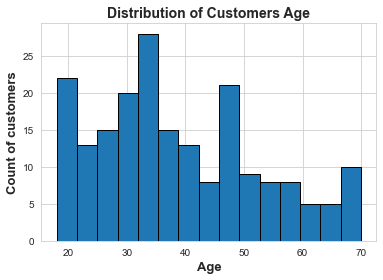

In [64]:
# plot histogram
plt.hist(df['Age'], bins=15, edgecolor='black')

# graph labels, title
plt.xlabel('Age', fontweight='bold', fontsize=13)
plt.ylabel('Count of customers', fontweight='bold', fontsize=13)
plt.title('Distribution of Customers Age', fontweight='bold', fontsize=14)
# display graph
plt.show()

- The histogram of distribution of customers' age is positively-skewed (right-skewed). 
- Popularity: 
    - Majority of the customers visiting the mall fall into younger age groups, while a minority fall into higher age groups.
- Marketing opportunities: 
    - The shopping mall can think of ways to satisfy the current popularity of the younger age groups, who have longer customer lifetime, to maintain its productivity.
    - It can also think of more ways to attract the older age groups, who may have higher purchasing power, to further increase its productivity. 
    - Such as by offering age-specific promotions or organize interesting programs.

<h3>Distribution of Customers' Income</h3>

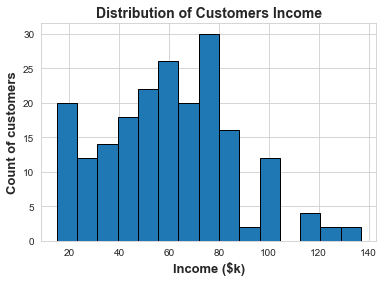

In [65]:
# plot histogram
plt.hist(df['Income ($k)'], bins=15, edgecolor='black')

# graph labels, title
plt.xlabel('Income ($k)', fontweight='bold', fontsize=13)
plt.ylabel('Count of customers', fontweight='bold', fontsize=13)
plt.title('Distribution of Customers Income', fontweight='bold', fontsize=14)
# display graph
plt.show()

- The histogram of distribution of customers' income is positively-skewed (right-skewed). 
- This indicates that majority of the customers' incomes fall between 20k dollars to 80k dollars, while a minority have incomes greater that $80k.

<h1><center>Building Clustering Algorithms</center></h1>

- There are many different clustering algorithms that have different purposes. 
- Clustering is joining data points together into similar clusters. 

<h3>K-means Clustering</h3>

- For my first clustering model, I have decided to build KMeans clustering. 
- This algorithm splits data points into K clusters based on their similarities, aims to minimize the variance within each cluster and maximize the separation between clusters.

<h4>Choosing the best number of clusters</h4>

- To choose the best number of clusters, I have first decided to use elbow curve and silhouette score to evaluate clustering quality.
- <b>Elbow curve</b> measures the mean distance between data points within the same cluster, and determines how well the data points within each cluster are grouped together.
- <b>Silhouette score</b> measures how well-separated the clusters are and how well each data point fits within its own cluster.

<h5>1. Elbow Curve</h5>

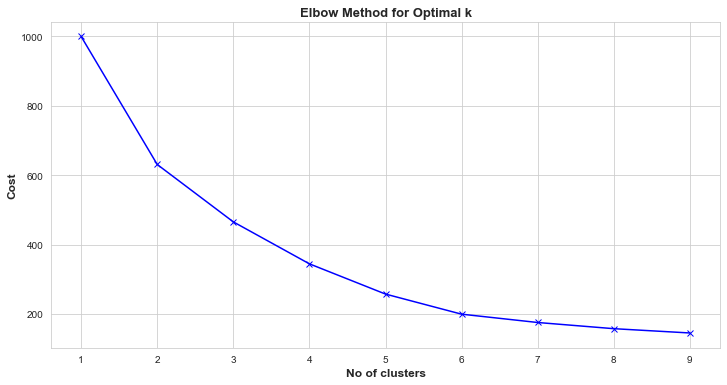

In [66]:
from sklearn.cluster import KMeans

# elbow curve
# select the relevant columns for clustering
X = dfNew[['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score']]

SSE = []
K = range(1,10)
for num_clusters in list(K):
    model = KMeans(n_clusters=num_clusters)
    model.fit(X)
    SSE.append(model.inertia_)
    
# create and set figure size
plt.figure(figsize=(12,6))
    
# plot graph
plt.plot(K, SSE, 'bx-')
# graph title and labels
plt.xlabel('No of clusters', fontsize=12, fontweight='bold')
plt.ylabel('Cost', fontsize=12, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=13, fontweight='bold')
# display graph
plt.show()

- As the number of clusters increases from 1 to 6, there is a generally smooth drop, however, as it continues to increase from 6, a slight elbow can be observed. 
- As such, it is evident that the number of clusters=6 is the most suitable choice. 
- However, we could also say that there is a slight elbow at around 3 clusters. To gain more accuracy on the number of clusters to be used, let's use silhouette scores to see if the results support the above. 

<h5>2. Silhouette Score</h5>

- The elbow curve itself is not accurate and reliable enough to determine the best number of clusters, as such let's take a look at the silhouette scores. 

For n_clusters=2, The Silhouette Coefficient is 0.339


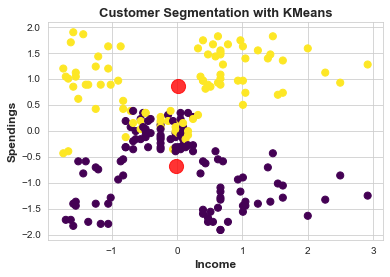




For n_clusters=3, The Silhouette Coefficient is 0.352


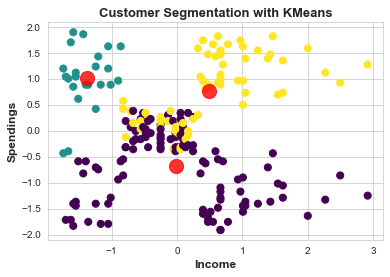




For n_clusters=4, The Silhouette Coefficient is 0.380


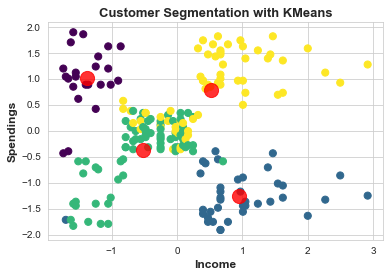




For n_clusters=5, The Silhouette Coefficient is 0.411


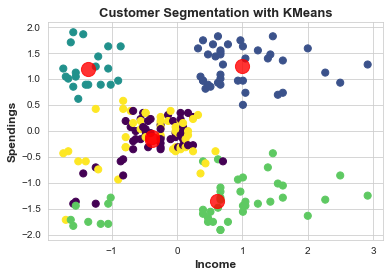




For n_clusters=6, The Silhouette Coefficient is 0.448


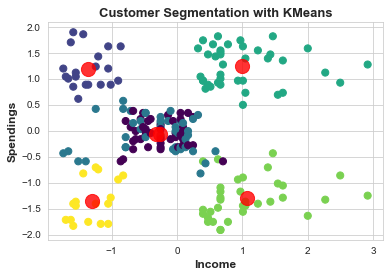




For n_clusters=7, The Silhouette Coefficient is 0.440


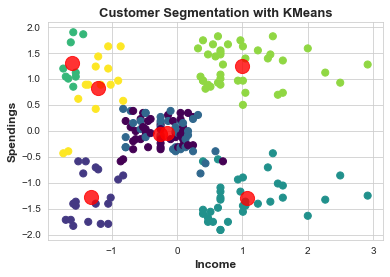

In [67]:
# clustering silhouette_score
# import all the necessary modules and libraries
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# select the relevant columns for clustering
X = dfNew[['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score']]

# trying different number of clusters
for k in range(2, 8):
    model = KMeans(n_clusters=k).fit(X)
    label = model.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))
    
    # visualize results
    y_kmeans = model.predict(X)

    # scatter plot the features
    plt.scatter(X['Income ($k)'], X['Spendings ($k)'], c=y_kmeans, s=50, cmap='viridis')
    # plot centroids for each cluster
    centers = model.cluster_centers_
    plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8)

    # graph title and labels
    plt.xlabel('Income', fontsize=12, fontweight='bold')
    plt.ylabel('Spendings', fontsize=12, fontweight='bold')
    plt.title('Customer Segmentation with KMeans', fontsize=13, fontweight='bold')

    # display graph
    plt.show()

    print('\n\n')

- Based on the results above, the highest/best silhouette scores are 0.448 and 0.440 for n_clusters equals to 6 and 7 respectively.
- Choice of cluster: 6.

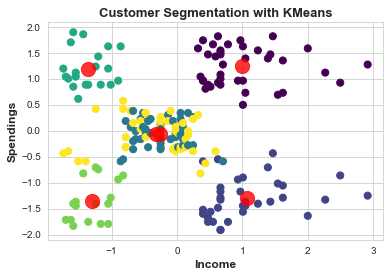

In [68]:
# final KMeans model (6 clusters)
# import necessary modules and libraries 
from sklearn.cluster import KMeans

# select the relevant columns for clustering
X = dfNew[['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score']]

# fit a KMeans model to the data
model = KMeans(n_clusters=6)
model.fit(X)

# visualize the results
y_kmeans = model.predict(X)

# scatter plot the features
plt.scatter(X['Income ($k)'], X['Spendings ($k)'], c=y_kmeans, s=50, cmap='viridis')
# plot centroids for each cluster
centers = model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8)

# graph labels and title 
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Spendings', fontsize=12, fontweight='bold')
plt.title('Customer Segmentation with KMeans', fontsize=13, fontweight='bold')

# display graph
plt.show()

<h3>Gaussian Mixture Model (GMM) Clustering</h3>

- Gaussian Mixture Model (GMM) models the distribution of data points in a multi-dimensional space. 
- It is particularly useful for clustering data points when the underlying data distribution is not linear or well-separated.

<h5>1. Silhouette Score</h5>

For n_clusters=2, The Silhouette Coefficient is 0.335


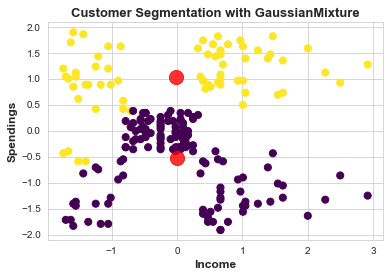




For n_clusters=3, The Silhouette Coefficient is 0.274


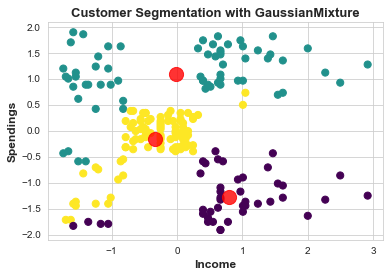




For n_clusters=4, The Silhouette Coefficient is 0.322


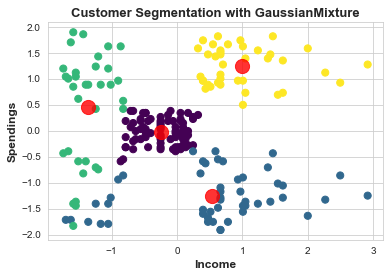




For n_clusters=5, The Silhouette Coefficient is 0.367


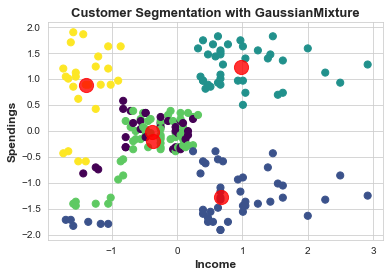




For n_clusters=6, The Silhouette Coefficient is 0.285


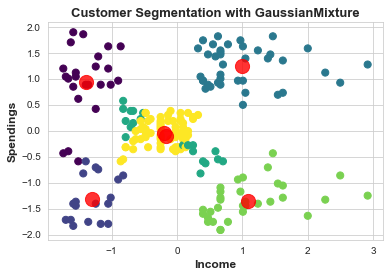

In [70]:
# import necessary modules and libraries 
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

# select the relevant columns for clustering
X = dfNew[['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score']]

# trying different number of clusters
for k in range(2, 7):
    # fit a GaussianMixture model to the data with 'k' components
    GMMmodel = GaussianMixture(n_components=k)
    y_gmm = GMMmodel.fit_predict(X)

    # calculate the Silhouette Coefficient
    sil_coeff = silhouette_score(X, y_gmm, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

    # visualize results
    plt.scatter(X['Income ($k)'], X['Spendings ($k)'], c=y_gmm, s=50, cmap='viridis')
    # plot centroids for each cluster (mean of each Gaussian component)
    centers = GMMmodel.means_
    plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8)

    # graph title and labels
    plt.xlabel('Income', fontsize=12, fontweight='bold')
    plt.ylabel('Spendings', fontsize=12, fontweight='bold')
    plt.title('Customer Segmentation with GaussianMixture', fontsize=13, fontweight='bold')

    # display graph 
    plt.show()

    print('\n\n')

- Based on the comparison above, it is evident that the most suitable number of clusters is 5 with SS of 0.367.
- It has the highest silhouette score. 

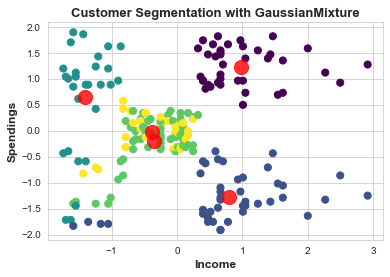

In [73]:
# final GMM model
# import necessary modules and libraries
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# select the relevant columns for clustering
X = dfNew[['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score']]

# fit a GaussianMixture model to the data with 'k' components
GMMmodel = GaussianMixture(n_components=5)
y_gmm = GMMmodel.fit_predict(X)

# scatter plot the features
plt.scatter(X['Income ($k)'], X['Spendings ($k)'], c=y_gmm, s=50, cmap='viridis')
# plot the means (centroids) for each cluster
centers = GMMmodel.means_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.8)

# graph labels and title
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Spendings', fontsize=12, fontweight='bold')
plt.title('Customer Segmentation with GaussianMixture', fontsize=13, fontweight='bold')

# display graph
plt.show()

<h3>Hierarchical Clustering</h3>

- Hierarchical clustering groups similar data points into clusters based on their pairwise similarities or distances. 
- It creates a hierarchical structure of clusters, where clusters can be further divided into smaller subclusters. 

- Distances and linkages are two key components of hierarchical clustering

- Distances: Distances refer to the measure of dissimilarity or similarity between two data points in a dataset.
- Linkages: Linkages refer to the method used to compute the distance between clusters during the clustering process.

In [74]:
# import necessary librarbies and modules
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import AgglomerativeClustering

- Below are the different methods of linkages

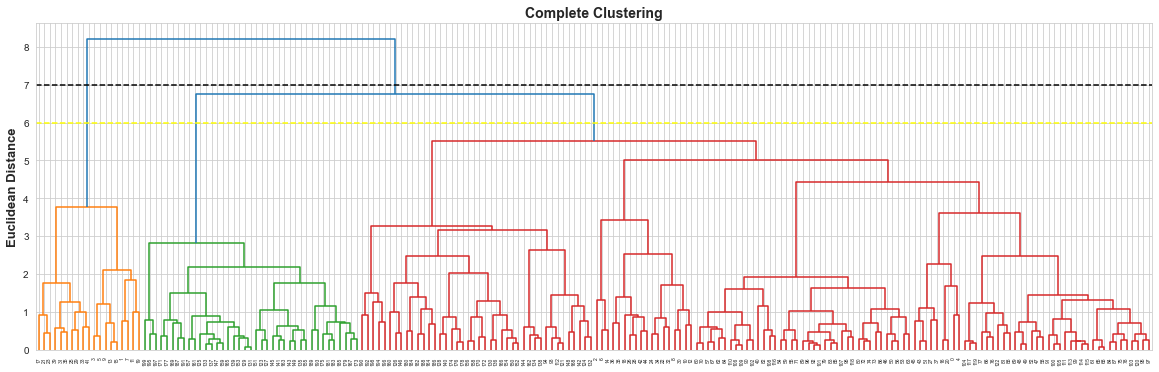

In [84]:
complete_clustering = linkage(dfNew, method='complete', metric='euclidean')

plt.figure(figsize=(20,6))
dendrogram(complete_clustering)
plt.title('Complete Clustering', fontsize=14, fontweight='bold')
plt.ylabel('Euclidean Distance', fontsize=13, fontweight='bold')
plt.axhline(y=7, color='black', linestyle='--')
plt.axhline(y=6, color='yellow', linestyle='--')
plt.show()

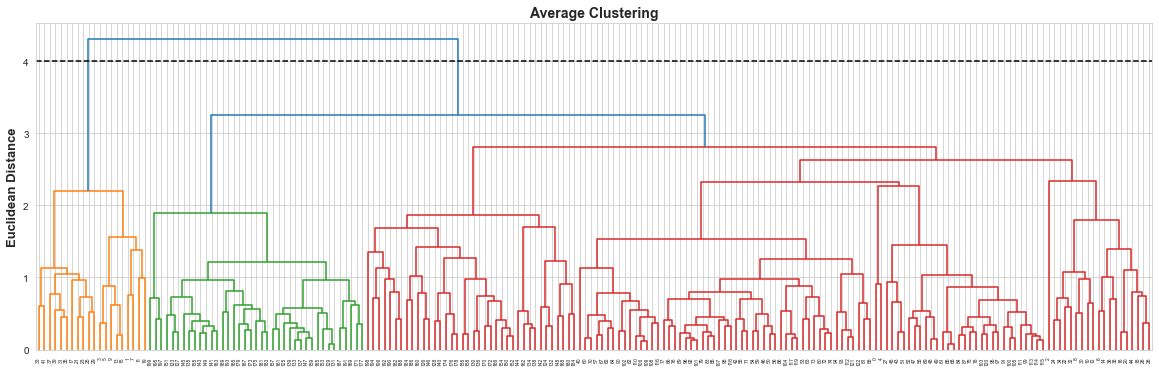

In [80]:
average_clustering = linkage(dfNew, method='average', metric='euclidean')

plt.figure(figsize=(20,6))
dendrogram(average_clustering)
plt.title('Average Clustering', fontsize=14, fontweight='bold')
plt.ylabel('Euclidean Distance', fontsize=13, fontweight='bold')
plt.axhline(y=4, color='black', linestyle='--')
plt.show()

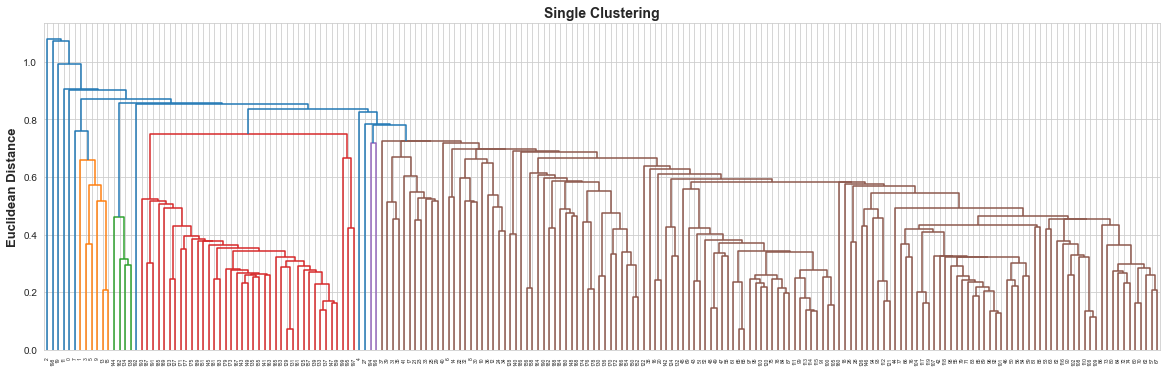

In [81]:
single_clustering = linkage(dfNew, method='single', metric='euclidean')

plt.figure(figsize=(20,6))
dendrogram(single_clustering)
plt.title('Single Clustering', fontsize=14, fontweight='bold')
plt.ylabel('Euclidean Distance', fontsize=13, fontweight='bold')
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.327


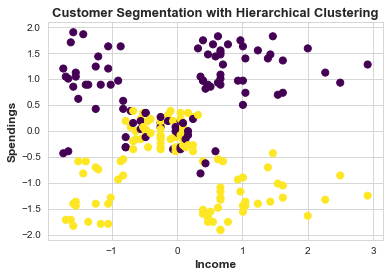

For n_clusters=3, The Silhouette Coefficient is 0.337


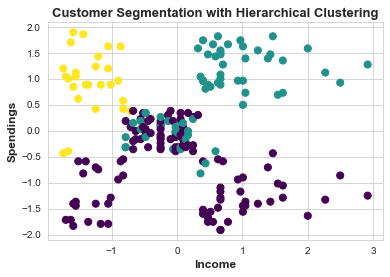

For n_clusters=4, The Silhouette Coefficient is 0.366


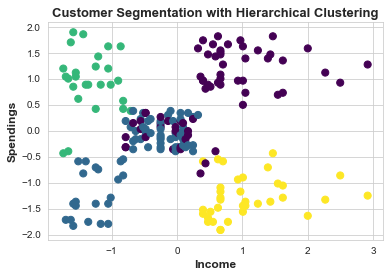

For n_clusters=5, The Silhouette Coefficient is 0.378


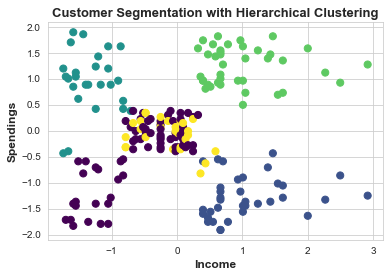

For n_clusters=6, The Silhouette Coefficient is 0.426


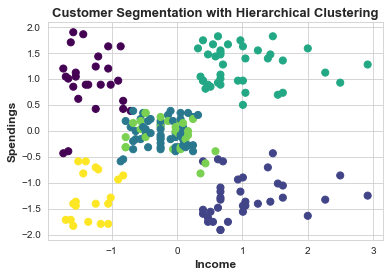

For n_clusters=7, The Silhouette Coefficient is 0.429


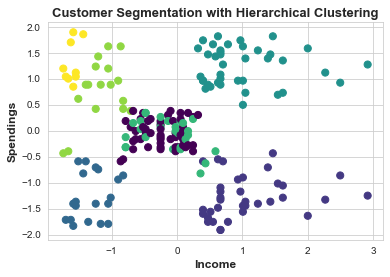

In [83]:
# import necessary modules and libraries
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# select the relevant columns for clustering
X = dfNew[['Age', 'Income ($k)', 'Spendings ($k)', 'Spending_Ratio', 'Spending_Score']]

# trying different number of clusters
for k in range(2, 8):
    # perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=k)
    y_hierarchical = model.fit_predict(X)

    # calculate the Silhouette Coefficient
    sil_coeff = silhouette_score(X, y_hierarchical, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k, sil_coeff))

    # visualize results
    plt.scatter(X['Income ($k)'], X['Spendings ($k)'], c=y_hierarchical, s=50, cmap='viridis')

    # graph title and labels
    plt.xlabel('Income', fontsize=12, fontweight='bold')
    plt.ylabel('Spendings', fontsize=12, fontweight='bold')
    plt.title('Customer Segmentation with Hierarchical Clustering', fontsize=13, fontweight='bold')

    # display graph for each value of 'k'
    plt.show()

- 5 to 7 clusters seems to be suitable.
- Chose 6 clusters as it is not as complex as 7 and its silhouette score is better than 5.

<h1><center>Conclusion/Final Insights gained</center></h1>

- Best number of clusters seem to be 5 or 6. 

- 5 to 6 different clusters:
    - Low income and low spendings
    - High income and low spendings
    - Low income and high spendings
    - High income and high spendings
    - Average income and average spendings

- Overlap in average income and average spending clusters may indicate that shopping mall have higher demand of this group of customers, hence can think of ways to attract them. 

<h1><center>End of Part B, thank you!</center></h1>